In [1]:
import pandas as pd

In [2]:
import community
import networkx as nx
import matplotlib.pyplot as plt

In [4]:
data=pd.read_csv('../2021_ICM_Problem_D_Data/influence_data.csv',encoding='gbk')

In [5]:
data.head()

influencer_id influencer_name influencer_main_genre  \
0         759491   The Exploited              Pop/Rock   
1          25462          Tricky            Electronic   
2          66915       Bob Dylan              Pop/Rock   
3          71209   Leonard Cohen              Pop/Rock   
4          91438    The Gun Club              Pop/Rock   

   influencer_active_start  follower_id   follower_name follower_main_genre  \
0                     1980           74  Special Duties            Pop/Rock   
1                     1990          335       PJ Harvey            Pop/Rock   
2                     1960          335       PJ Harvey            Pop/Rock   
3                     1950          335       PJ Harvey            Pop/Rock   
4                     1980          335       PJ Harvey            Pop/Rock   

   follower_active_start  
0                   1980  
1                   1990  
2                   1990  
3                   1990  
4                   1990

In [10]:
G=nx.Graph()

In [11]:
influencer=[]
follower=[]
for line in data.iterrows():
    influencer.append(line[1]['influencer_id'])
    follower.append(line[1]['follower_id'])


In [12]:
for i in range(len(influencer)):
    G.add_edge(influencer[i],follower[i])#此处有向图的指向是1指向2

In [13]:
partition = community.best_partition(G)

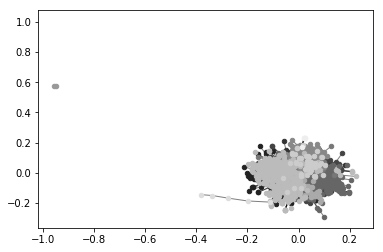

In [14]:
size = float(len(set(partition.values())))
pos = nx.spring_layout(G)
count = 0.
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 20,
                                node_color = str(count / size))


nx.draw_networkx_edges(G,pos, alpha=0.5)
plt.show()

In [15]:
gephi_data=data.loc[:,['influencer_id','influencer_main_genre','follower_id','follower_main_genre']]

In [17]:
gephi_data.to_csv('test_gephi.csv')

In [23]:
influencer_id=data['influencer_id'].unique()

In [24]:
follower_id=data['follower_id'].unique()

In [25]:
for fo_id in follower_id:
    if fo_id not in follower_id:
        influencer_id.append(fo_id)

In [27]:
len(influencer_id)

3774

In [28]:
name_list=[]
for ida in influencer_id:
    idb=data

In [29]:
data_new=pd.read_csv('full_music plus geners.csv')

In [30]:
data_new.head()

Unnamed: 0           artist_names  artists_id  danceability  energy  \
0           0  ["Fat Freddy's Drop"]      178301         0.600   0.365   
1           1  ["Fat Freddy's Drop"]      178301         0.874   0.326   
2           2  ["Fat Freddy's Drop"]      178301         0.670   0.531   
3           3   ["Alexander O'Neal"]      625201         0.761   0.702   
4           4   ["Alexander O'Neal"]      625201         0.661   0.828   

   valence    tempo  loudness  mode  key  ...   instrumentalness  liveness  \
0    0.131  130.046   -13.083     0    9  ...           0.585000    0.0921   
1    0.179  119.620   -13.302     0   11  ...           0.148000    0.0993   
2    0.336  139.385    -8.267     0    9  ...           0.345000    0.3060   
3    0.850  104.773    -8.523     1    7  ...           0.000031    0.0935   
4    0.902  115.078   -12.673     0   11  ...           0.000001    0.2870   

   speechiness  explicit  duration_ms  popularity  year  release_date  \
0       0.0498         0       437200          54  2005          2005   
1       0.1310         0       581008          53  2005          2005   
2       0.0377         0       431293          55  2009      8/7/2009   
3       0.0389         0       304427          34  1991      1/1/1991   
4       0.0390         0       264933          37  1987     7/29/1987   

                  song_title (censored) genre  
0                                 Ernie   NaN  
1                         Wandering Eye   NaN  
2                              The Raft   NaN  
3                          All True Man  R&B;  
4  (What Can I Say) To Make You Love Me  R&B;  

[5 rows x 21 columns]

In [34]:
data_new.dropna(inplace=True)

In [35]:
id_line=data_new['artists_id'].unique()

In [37]:
len(id_line)

4888

In [43]:
field_line=[]
for i in id_line:
    field=data_new[data_new['artists_id']==i]['genre'].values[0]
    field_line.append(field)

In [44]:
len(field_line)

4888

In [45]:
point_data=pd.DataFrame()
point_data['Id']=id_line
point_data['Label']=field_line

In [47]:
point_data.to_csv('point_data.csv')

In [52]:
data[data['influencer_id']==778656]

influencer_id                   influencer_name influencer_main_genre  \
39539         778656  Cornelius Brothers & Sister Rose                  R&B;   

       influencer_active_start  follower_id    follower_name  \
39539                     1970       935739  Musiq Soulchild   

      follower_main_genre  follower_active_start  
39539                R&B;                   2000

# 制作社区图用的数据

In [53]:
gephi_data=data.loc[:,['influencer_id','influencer_main_genre','follower_id','follower_main_genre']]

In [54]:
inf_id=gephi_data['influencer_id'].unique()
fol_id=gephi_data['follower_id'].unique

In [64]:
node_id=[]
field_id=[]
for fo_id in follower_id:
    if fo_id not in influencer_id:
        node_id.append(fo_id)
        field_id.append(gephi_data[gephi_data['follower_id']==fo_id]['follower_main_genre'].values[0])

In [65]:
for in_id in inf_id:
    node_id.append(in_id)
    field_id.append(gephi_data[gephi_data['influencer_id']==in_id]['influencer_main_genre'].values[0])

In [66]:
len(node_id)

5603

In [67]:
len(field_id)

5603

In [68]:
gephidata_1739=pd.DataFrame()
gephidata_1739['Id']=node_id
gephidata_1739['Label']=field_id
gephidata_1739.to_csv('gephidata_1739.csv')